<a href="https://colab.research.google.com/github/a-njan-a/Pending-cases-in-India/blob/main/Pending_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import geopandas as gpd
import shapefile as shp

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Pending case/NDAP_REPORT_7150.csv')
df.shape

(2067, 29)

In [ ]:
df.head()

,Rowid,Country,State lgd code,State,District lgd code,District,Year,District and taluk court case type,Pending cases for a period of 0 to 1 years,Pending cases for a period of 1 to 3 years,...,Pending execution cases,Cases pending at appearance or service-related stage,Cases pending at compliance or steps or stay stage,Cases pending at evidence or argument or judgement stage,Cases pending at pleadings or issues or charge stage,Cases instituted in last month,Cases disposed in last month,Cases filed by senior citizens,Cases filed by women,Cases delayed in disposal
0,1,India,1,Jammu And Kashmir,1,Anantnag,2021,Civil,3260.0,1510.0,...,276.0,3210.0,784.0,1010.0,104.0,384.0,241.0,750.0,562.0,1.0
1,2,India,1,Jammu And Kashmir,1,Anantnag,2021,Criminal,3481.0,1762.0,...,180.0,2628.0,414.0,2421.0,559.0,680.0,616.0,114.0,499.0,0.0
2,3,India,1,Jammu And Kashmir,1,Anantnag,2021,Total,6741.0,3272.0,...,456.0,5838.0,1198.0,3431.0,663.0,1064.0,857.0,864.0,1061.0,1.0
3,4,India,1,Jammu And Kashmir,2,Budgam,2021,Civil,1652.0,1011.0,...,134.0,934.0,400.0,723.0,254.0,130.0,140.0,521.0,449.0,14.0
4,5,India,1,Jammu And Kashmir,2,Budgam,2021,Criminal,2183.0,1865.0,...,70.0,1288.0,245.0,2167.0,41.0,244.0,278.0,79.0,472.0,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 29 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Rowid                                                     2067 non-null   int64  
 1   Country                                                   2067 non-null   object 
 2   State lgd code                                            2067 non-null   int64  
 3   State                                                     2067 non-null   object 
 4   District lgd code                                         2067 non-null   int64  
 5   District                                                  2067 non-null   object 
 6   Year                                                      2067 non-null   int64  
 7   District and taluk court case type                        2067 non-null   object 
 8   Pending cases for 

In [ ]:
#Split between criminal and civil cases
result = df.groupby('District and taluk court case type')['Pending cases'].agg('sum')
result

District and taluk court case type
Civil       10694703.0
Criminal    29447365.0
Total       40142068.0
Name: Pending cases, dtype: float64

In [ ]:
total_cases = result['Total']
civil_cases = result['Civil']
criminal_cases = result['Criminal']

civil_percentage = (civil_cases / total_cases) * 100
criminal_percentage = (criminal_cases / total_cases) * 100

print(f"The percentage of civil cases is {round(civil_percentage,2)}%.")
print(f"The percentage of criminal cases is {round(criminal_percentage,2)}%.")

The percentage of civil cases is 26.64%.
The percentage of criminal cases is 73.36%.


A total of around 4 crores cases are pending of which 26% are civil cases and 73% are criminal cases.

In [ ]:
df1 = df[df['District and taluk court case type']!='Total']
df1 = df1.rename(columns={'District and taluk court case type':'Case_type'})
df1 = df1.rename(columns={'Pending cases':'Pending_cases'})

In [ ]:
#Breakup of case types - civil and criminal

case_type = df1.groupby('Case_type')['Pending_cases'].agg('sum').reset_index()

dat1 = go.Pie(values=case_type.Pending_cases,labels=case_type.Case_type)
lay1 = go.Layout(title='Break-up of case type in lakhs',height=500,width=500)
fig1 = go.Figure(dat1,lay1)
py.iplot(fig1,filename='casetype')

In [ ]:
df1['pending_over_5_yrs'] = df['Pending cases for a period of 5 to 10 years'] + df['Pending cases for a period of 10 to 20 years']+df['Pending cases for a period of 20 to 30 years']+df['Pending cases over 30 years']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 2065
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Rowid                                                     1378 non-null   int64  
 1   Country                                                   1378 non-null   object 
 2   State lgd code                                            1378 non-null   int64  
 3   State                                                     1378 non-null   object 
 4   District lgd code                                         1378 non-null   int64  
 5   District                                                  1378 non-null   object 
 6   Year                                                      1378 non-null   int64  
 7   Case_type                                                 1378 non-null   object 
 8   Pending cases for 

In [ ]:
#Statewise distribution of pending cases

states_pending_total = df1.groupby('State')['Pending_cases'].agg('sum').reset_index()
states_5yrs_total = df1.groupby('State')['pending_over_5_yrs'].agg('sum').reset_index()
states_5yrs_comb = pd.merge(states_pending_total,states_5yrs_total,on='State')
states_5yrs_comb['perc_over_5yrs'] = states_5yrs_comb['pending_over_5_yrs']/states_5yrs_comb['Pending_cases']*100
states_5yrs_comb1 = states_5yrs_comb.groupby('State')['perc_over_5yrs'].agg('mean').sort_values(ascending=False).reset_index()

dat2 = go.Bar(x=states_5yrs_comb1.State,y=states_5yrs_comb1.perc_over_5yrs,)
lay2 = go.Layout(title='States with highest % of cases pending for >5 years',height=600,width=1200)
fig2 = go.Figure(dat2,lay2)
py.iplot(fig2,filename='5yrs')

In [ ]:
state_case_type = df1.groupby(['State','Case_type'])['Pending_cases'].agg('sum').reset_index()

state_case_type.head(10)

,State,Case_type,Pending_cases
0,Andaman And Nicobar Islands,Civil,0.0
1,Andaman And Nicobar Islands,Criminal,0.0
2,Andhra Pradesh,Civil,410998.0
3,Andhra Pradesh,Criminal,346059.0
4,Assam,Civil,84700.0
5,Assam,Criminal,318280.0
6,Bihar,Civil,467653.0
7,Bihar,Criminal,2895463.0
8,Chandigarh,Civil,23099.0
9,Chandigarh,Criminal,43547.0


In [ ]:
state_wise_case_pivot = pd.pivot_table(data=state_case_type,values='Pending_cases',index='State',columns='Case_type').reset_index()

state_wise_case_pivot['criminal_pcnt'] = (state_wise_case_pivot['Criminal']/(state_wise_case_pivot['Civil']+state_wise_case_pivot['Criminal']))*100
state_wise_case_pivot['civil_pcnt'] = 100-state_wise_case_pivot['criminal_pcnt']
state_wise_case_pivot1 = state_wise_case_pivot.groupby('State')['criminal_pcnt'].agg('mean').sort_values(ascending=False).reset_index()
state_wise_case_pivot2 = state_wise_case_pivot.groupby('State')['civil_pcnt'].agg('mean').sort_values(ascending=False).reset_index()

dat3 = go.Bar(x=state_wise_case_pivot1.State,y=state_wise_case_pivot1.criminal_pcnt)
lay3 = go.Layout(title='States with highest % of criminal cases',height=600,width=1200)
fig3 = go.Figure(dat3,lay3)
py.iplot(fig3,filename='criminal')


In [ ]:
fig = px.line_polar(state_wise_case_pivot1, r='criminal_pcnt', theta='State', line_close=True, title='States with highest % of criminal cases')
fig.show()

In [ ]:
dat4 = go.Bar(x=state_wise_case_pivot2.State,y=state_wise_case_pivot2.civil_pcnt)
lay4 = go.Layout(title='States with highest % of civil cases',height=600,width=1200)
fig4 = go.Figure(dat4,lay4)
py.iplot(fig4,filename='civil')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=state_wise_case_pivot2['State'],
    y=state_wise_case_pivot2['civil_pcnt'],
    mode='lines+markers',
    name='Civil Cases Percentage'
))


fig.update_layout(
    title='States with Highest % of Civil Cases',
    xaxis_title='State',
    yaxis_title='% of Civil Cases',
    height=600,
    width=1200
)

fig.show()

In [ ]:
pend_evidence = df1.groupby('Case_type')['Cases pending at evidence or argument or judgement stage'].agg('sum').reset_index()
pending_compliance = df1.groupby('Case_type')['Cases pending at compliance or steps or stay stage'].agg('sum').reset_index()
pending_appearance = df1.groupby('Case_type')['Cases pending at appearance or service-related stage'].agg('sum').reset_index()
pending_charge = df1.groupby('Case_type')['Cases pending at pleadings or issues or charge stage'].agg('sum').reset_index()

pend_1 = pd.merge(pend_evidence,pending_compliance,on='Case_type')
pend_2 = pd.merge(pending_appearance,pending_charge,on='Case_type')
pend_3 = pd.merge(pend_1,pend_2,on='Case_type')

pend_3

,Case_type,Cases pending at evidence or argument or judgement stage,Cases pending at compliance or steps or stay stage,Cases pending at appearance or service-related stage,Cases pending at pleadings or issues or charge stage
0,Civil,4205686.0,1847710.0,2706021.0,1453075.0
1,Criminal,9193665.0,2067870.0,13440245.0,3072056.0


In [ ]:
pend_pivot = pend_3.transpose()
pend_pivot

,0,1
Case_type,Civil,Criminal
Cases pending at evidence or argument or judgement stage,4205686.0,9193665.0
Cases pending at compliance or steps or stay stage,1847710.0,2067870.0
Cases pending at appearance or service-related stage,2706021.0,13440245.0
Cases pending at pleadings or issues or charge stage,1453075.0,3072056.0


In [ ]:
pend_pivot = pend_3.transpose()
pend_pivot = pend_pivot.drop("Case_type")
pend_pivot = pend_pivot.rename(columns={0:'Civil',1:'Criminal','index':'pending_type'})

pend_pivot

,Civil,Criminal
Cases pending at evidence or argument or judgement stage,4205686.0,9193665.0
Cases pending at compliance or steps or stay stage,1847710.0,2067870.0
Cases pending at appearance or service-related stage,2706021.0,13440245.0
Cases pending at pleadings or issues or charge stage,1453075.0,3072056.0


In [ ]:
fig = px.bar(pend_pivot,x=pend_pivot.index,y='Civil',title='Pendency reasons for Civil cases')
fig.show()


In [ ]:
fig1 = px.area(pend_pivot, x=pend_pivot.index, y='Criminal', title='Pendency reasons for criminal cases')
fig1.show()

In [ ]:
year = 2021
state = 'Jammu And Kashmir'
columns_to_plot = ['District', 'Cases pending at pleadings or issues or charge stage', 'Cases pending at appearance or service-related stage', 'Cases pending at compliance or steps or stay stage']

filtered_df = df[(df['Year'] == year) & (df['State'] == state)][columns_to_plot]


stacked_df = filtered_df.melt(id_vars=['District'], var_name='Stage', value_name='Number of Cases')

fig = px.bar(stacked_df, x='District', y='Number of Cases', color='Stage', title=f'Composition of Pending Cases by Stage in {year} - {state}',
             labels={'District': 'District', 'Stage': 'Stage', 'Number of Cases': 'Number of Cases'})
fig.update_layout(barmode='relative')
fig.show()

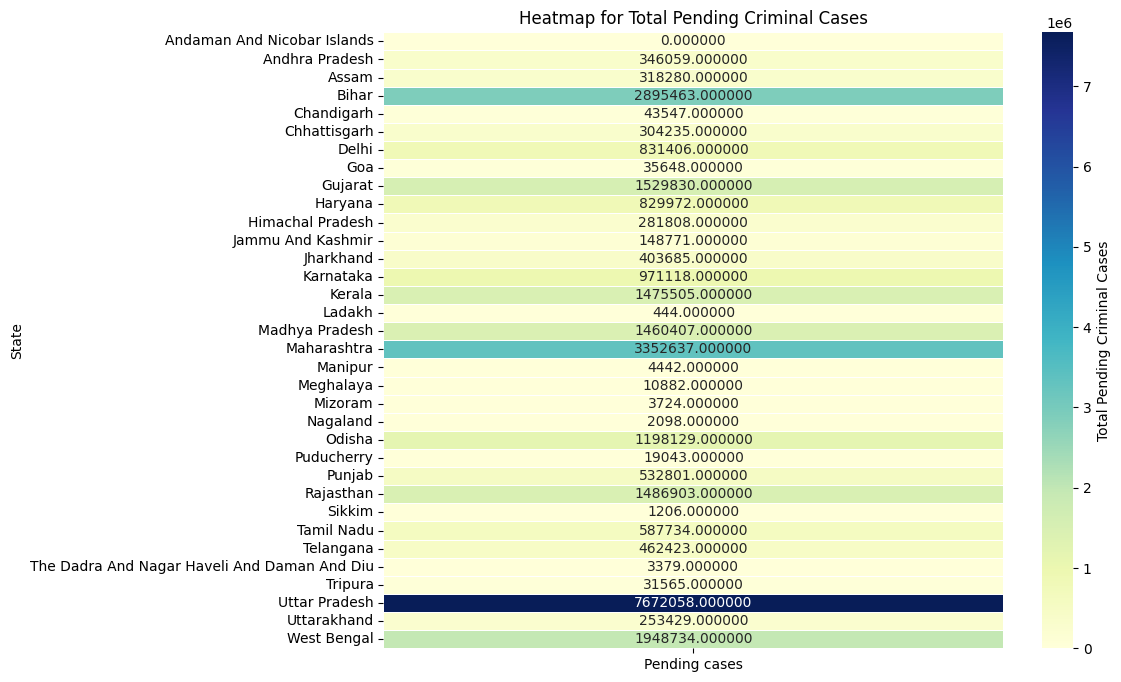

In [ ]:
year = 2021
criminal_df = df[(df['District and taluk court case type'] == 'Criminal')]

pivot_df = criminal_df.pivot_table(index='State', values='Pending cases', aggfunc='sum')


plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='f', linewidths=0.5, cbar_kws={'label': 'Total Pending Criminal Cases'})
plt.title(f'Heatmap for Total Pending Criminal Cases')
plt.show()

In [ ]:
fp = r'/content/drive/MyDrive/Projects/Pending case/Maps_with_python-master/india-polygon.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
6,None,Dadra and Nagar Haveli,"POLYGON ((73.20640 20.12165, 73.20865 20.10695..."
7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
8,None,Goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698..."
9,None,Gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23..."


In [ ]:
cases_women = df1.groupby('State')['Cases filed by women'].agg('sum').reset_index()
cases_women['State'].replace("Jammu And Kashmir", "Jammu and Kashmir", inplace = True)
cases_women['State'].replace("The Dadra And Nagar Haveli And Daman And Diu", "Daman and Diu", inplace = True)
cases_women.at[29,"Cases filed by women"] = 207.0
cases_women.loc[len(cases_women.index)] = ['Dadra And Nagar Haveli', 177]


In [ ]:
cases_women

,State,Cases filed by women
0,Andaman And Nicobar Islands,0.0
1,Andhra Pradesh,105337.0
2,Assam,49450.0
3,Bihar,374979.0
4,Chandigarh,6920.0
5,Chhattisgarh,29450.0
6,Delhi,79883.0
7,Goa,7228.0
8,Gujarat,96743.0
9,Haryana,105391.0


In [ ]:
#Merging the data
merged = map_df.set_index('st_nm').join(cases_women.set_index('State'))
merged['Cases filed by women'] = merged['Cases filed by women'].replace(np.nan, 0)
merged.head()


,id,geometry,Cases filed by women
st_nm,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",49450.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",374979.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",6920.0


In [ ]:
fig = px.choropleth(merged,
                    geojson=merged.geometry,
                    locations=merged.index,
                    color='Cases filed by women',
                    color_continuous_scale="speed",
                    scope="asia",
                    labels={'count':'Cases filed by women'}
                   )

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='Pending cases filed by women')
fig.show()

In [ ]:
cases_women = df1.groupby('State')['Cases filed by women'].agg('sum').reset_index()
cases_women['State'].replace("Jammu And Kashmir", "Jammu and Kashmir", inplace=True)
cases_women['State'].replace("The Dadra And Nagar Haveli And Daman And Diu", "Daman and Diu", inplace=True)
cases_women.at[29, "Cases filed by women"] = 207.0
cases_women.loc[len(cases_women.index)] = ['Dadra And Nagar Haveli', 177]

cases_sen = df1.groupby('State')['Cases filed by senior citizens'].agg('sum').reset_index()
cases_sen['State'].replace("Jammu And Kashmir", "Jammu and Kashmir", inplace=True)
cases_sen['State'].replace("The Dadra And Nagar Haveli And Daman And Diu", "Daman and Diu", inplace=True)
cases_sen.at[29, "Cases filed by senior citizens"] = 207.0
cases_sen.loc[len(cases_sen.index)] = ['Dadra And Nagar Haveli', 177]


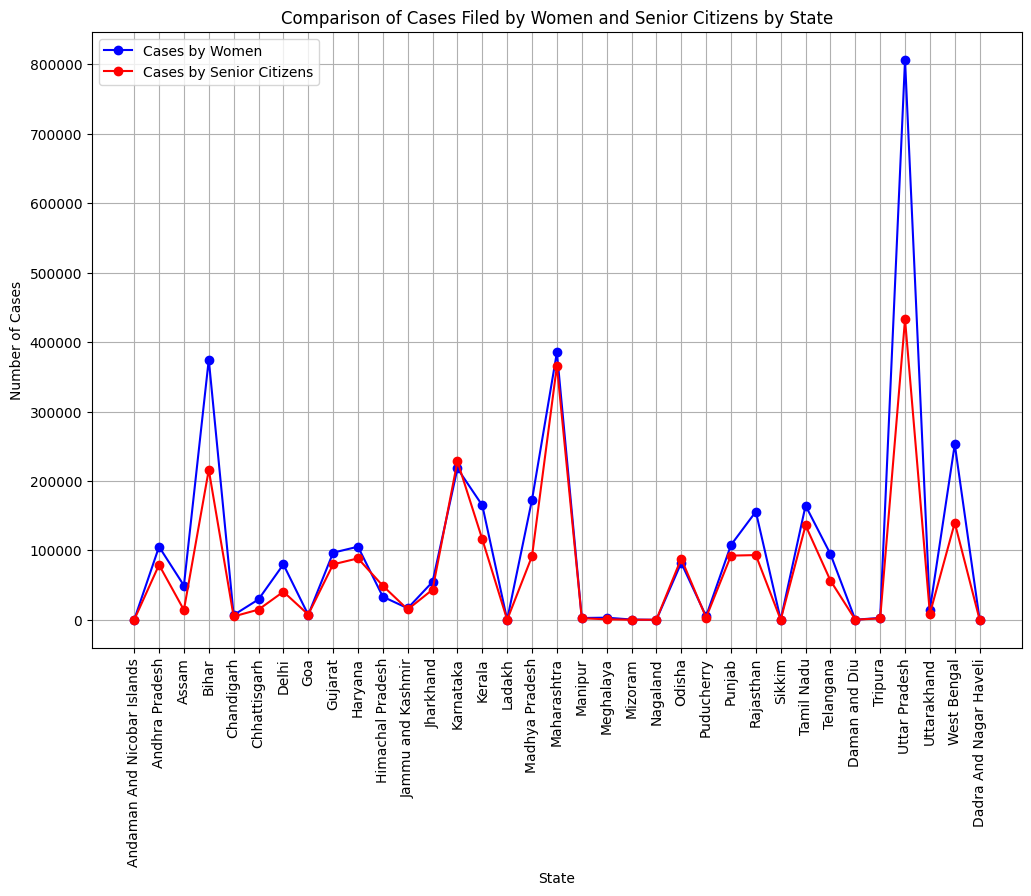

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.gca()


ax.plot(cases_women['State'], cases_women['Cases filed by women'], marker='o', label='Cases by Women', color='blue')
ax.plot(cases_sen['State'], cases_sen['Cases filed by senior citizens'], marker='o', label='Cases by Senior Citizens', color='red')

plt.title('Comparison of Cases Filed by Women and Senior Citizens by State')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
pend_evidence1 = df1.groupby('State')['Cases pending at evidence or argument or judgement stage'].agg('sum').reset_index()
pending_compliance1 = df1.groupby('State')['Cases pending at compliance or steps or stay stage'].agg('sum').reset_index()
pending_appearance1 = df1.groupby('State')['Cases pending at appearance or service-related stage'].agg('sum').reset_index()
pending_charge1 = df1.groupby('State')['Cases pending at pleadings or issues or charge stage'].agg('sum').reset_index()

In [ ]:
pending_1 = pd.merge(pend_evidence1,pending_compliance1,on='State')
pending_2 = pd.merge(pending_appearance1,pending_charge1,on='State')
pending_3 = pd.merge(pending_1,pending_2,on='State')

pending_3

,State,Cases pending at evidence or argument or judgement stage,Cases pending at compliance or steps or stay stage,Cases pending at appearance or service-related stage,Cases pending at pleadings or issues or charge stage
0,Andaman And Nicobar Islands,0.0,0.0,0.0,0.0
1,Andhra Pradesh,235930.0,104213.0,326856.0,72393.0
2,Assam,144913.0,39702.0,187292.0,13692.0
3,Bihar,1048095.0,329512.0,1230988.0,595448.0
4,Chandigarh,26095.0,2887.0,36037.0,1486.0
5,Chhattisgarh,159127.0,15694.0,102809.0,91285.0
6,Delhi,348343.0,114111.0,567864.0,47531.0
7,Goa,18913.0,14987.0,24062.0,2802.0
8,Gujarat,583560.0,35083.0,1266761.0,75877.0
9,Haryana,417778.0,34992.0,685244.0,118048.0


In [ ]:
fig = px.scatter_3d(pending_3, x='Cases pending at evidence or argument or judgement stage',
                    y='Cases pending at compliance or steps or stay stage',
                    z='Cases pending at appearance or service-related stage',
                    hover_name = 'State')
fig.update_layout(scene=dict(xaxis_title='evidence or argument or judgement stage', yaxis_title='compliance or steps or stay stage',
                             zaxis_title='appearance or service-related stage'))
fig.show()

In [ ]:
pend_year1 = df1.groupby('State')['Pending cases for a period of 0 to 1 years'].agg('sum').reset_index()
pend_year2 = df1.groupby('State')['Pending cases for a period of 1 to 3 years'].agg('sum').reset_index()
pend_year3 = df1.groupby('State')['Pending cases for a period of 3 to 5 years'].agg('sum').reset_index()
pend_year4 = df1.groupby('State')['Pending cases for a period of 5 to 10 years'].agg('sum').reset_index()
pend_year5 = df1.groupby('State')['Pending cases for a period of 10 to 20 years'].agg('sum').reset_index()
pend_year6 = df1.groupby('State')['Pending cases for a period of 20 to 30 years'].agg('sum').reset_index()

pending_1 = pd.merge(pend_year1, pend_year2, on='State')
pending_2 = pd.merge(pend_year3, pend_year4, on='State')
pending_3 = pd.merge(pend_year5, pend_year6, on='State')
pending_4 = pd.merge(pending_1, pending_2, on='State')
pending_5 = pd.merge(pending_4, pending_3, on='State')

pending_5

,State,Pending cases for a period of 0 to 1 years,Pending cases for a period of 1 to 3 years,Pending cases for a period of 3 to 5 years,Pending cases for a period of 5 to 10 years,Pending cases for a period of 10 to 20 years,Pending cases for a period of 20 to 30 years
0,Andaman And Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0
1,Andhra Pradesh,315398.0,272656.0,109365.0,52926.0,6304.0,344.0
2,Assam,171371.0,136355.0,52661.0,38369.0,3933.0,263.0
3,Bihar,681596.0,878416.0,560179.0,734523.0,429796.0,67396.0
4,Chandigarh,30243.0,28542.0,6166.0,1563.0,123.0,9.0
5,Chhattisgarh,161317.0,134937.0,55309.0,20123.0,1730.0,187.0
6,Delhi,396207.0,419472.0,170513.0,84098.0,9153.0,435.0
7,Goa,23224.0,20200.0,8729.0,6663.0,1571.0,545.0
8,Gujarat,834242.0,576406.0,216675.0,197038.0,128671.0,39114.0
9,Haryana,587121.0,501660.0,145290.0,22916.0,1217.0,55.0


In [ ]:
fig = px.parallel_coordinates(pending_5, labels={"Pending cases for a period of 0 to 1 years": "0 to 1 years",
                                                 "Pending cases for a period of 1 to 3 years": "1 to 3 years",
                                                 "Pending cases for a period of 3 to 5 years": "3 to 5 years",
                                                 "Pending cases for a period of 5 to 10 years": "5 to 10 years",
                                                 "Pending cases for a period of 10 to 20 years": "10 to 20 years",
                                                 "Pending cases for a period of 20 to 30 years": "20 to 30 years"})

fig.show()